In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)
filepath = 'Datasets/World Bank Cleaned/Life Expectancy World Bank.csv'
df = pd.read_csv(filepath)
df.head()

,Country Name,Year,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",CO2 emissions (metric tons per capita),GDP (current US$),GNI (current US$),Current health expenditure per capita (current US$),"Immunization, DPT (% of children ages 12-23 months)","Immunization, HepB3 (% of one-year-old children)","Immunization, measles (% of children ages 12-23 months)","Life expectancy at birth, total (years)","Hospital beds (per 1,000 people)","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)","Mortality rate, adult, female (per 1,000 female adults)","Mortality rate, adult, male (per 1,000 male adults)","Mortality caused by road traffic injury (per 100,000 population)","Mortality rate, under-5 (per 1,000 live births)","Physicians (per 1,000 people)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)","Population, total",Prevalence of undernourishment (% of population),"Suicide mortality rate (per 100,000 population)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Afghanistan,2005,12.500,28.670,0.027,0.080,6203256497.090,10107195903.417,25.107,58.000,63.000,50.000,58.361,0.420,40.900,259.868,310.940,15.200,108.600,0.166,46.152,24411191.000,34.500,5.000,7.925
1,Afghanistan,2006,13.900,33.544,0.024,0.090,6971758332.889,10107195903.417,28.920,58.000,63.000,53.000,58.684,0.420,40.500,254.511,314.837,15.100,104.300,0.166,47.286,25442944.000,31.900,4.900,7.925
2,Afghanistan,2007,15.300,38.440,0.021,0.110,9747886104.533,10107195903.417,32.717,63.000,63.000,55.000,59.111,0.420,40.100,247.960,318.012,15.000,100.000,0.182,48.420,25903301.000,28.600,4.800,7.924
3,Afghanistan,2008,16.800,42.400,0.018,0.166,10109296957.657,10107195903.417,39.970,64.000,64.000,59.000,59.852,0.420,39.400,241.256,305.060,15.000,95.900,0.183,49.554,26427199.000,25.400,4.600,7.928
4,Afghanistan,2009,18.200,48.279,0.015,0.240,12416152648.057,12378340846.019,43.261,63.000,63.000,60.000,60.364,0.420,38.400,236.917,293.605,14.400,91.800,0.220,50.688,27385307.000,22.200,4.400,7.923


In [3]:
df.describe()

,Year,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",CO2 emissions (metric tons per capita),GDP (current US$),GNI (current US$),Current health expenditure per capita (current US$),"Immunization, DPT (% of children ages 12-23 months)","Immunization, HepB3 (% of one-year-old children)","Immunization, measles (% of children ages 12-23 months)","Life expectancy at birth, total (years)","Hospital beds (per 1,000 people)","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)","Mortality rate, adult, female (per 1,000 female adults)","Mortality rate, adult, male (per 1,000 male adults)","Mortality caused by road traffic injury (per 100,000 population)","Mortality rate, under-5 (per 1,000 live births)","Physicians (per 1,000 people)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)","Population, total",Prevalence of undernourishment (% of population),"Suicide mortality rate (per 100,000 population)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
count,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000
mean,2009.754,62.711,77.945,5.728,4.054,411566957339.395,412099840672.237,848.426,87.144,82.384,86.095,69.608,2.941,21.698,153.033,228.582,18.528,39.584,1.605,29.216,45792805.888,11.242,10.874,7.992
std,5.727,38.763,30.448,4.198,4.878,1556169929306.132,1574032136913.362,1595.854,13.924,20.018,14.250,8.909,2.517,7.851,114.453,120.767,8.830,40.629,1.478,16.905,153277176.506,10.594,9.233,5.907
min,2000.000,0.100,1.280,0.000,0.025,75951133.378,72802110.899,4.448,19.000,2.000,16.000,41.957,0.100,7.300,22.070,49.162,2.100,2.300,0.011,5.447,104924.000,2.500,0.000,0.116
25%,2005.000,23.350,56.933,2.116,0.599,8752235301.353,8546227897.176,57.190,83.000,76.000,80.000,63.852,1.000,15.725,71.767,137.290,12.100,8.625,0.267,17.123,3537437.250,2.500,5.200,3.850
50%,2010.000,80.700,97.246,5.322,2.192,32682471928.499,31584287653.180,190.400,92.000,90.500,92.000,71.409,2.100,21.600,116.269,209.547,17.100,22.800,1.248,24.211,10704332.000,6.700,8.200,6.215
75%,2015.000,100.000,100.000,8.900,5.990,210792779003.145,205387340539.192,695.165,97.000,96.000,96.000,76.449,4.207,26.400,200.080,295.014,25.500,60.375,2.652,37.459,32797970.750,16.500,13.500,10.651
max,2019.000,100.000,100.000,19.047,31.274,21380976119000.000,21760847000000.000,10661.028,99.000,99.000,99.000,84.356,14.690,48.100,752.858,774.859,64.600,228.500,8.427,95.243,1407745000.000,54.000,92.600,37.320


In [4]:
corr = df.drop(['Country Name', 'Year'], axis=1).corr()
high_corr_pairs = []

# Iterate over the correlation matrix
for i in range(len(corr.columns)):
    for j in range(i + 1, len(corr.columns)):  # i+1 to avoid self-correlation
        if corr.columns[i] == 'Life expectancy at birth, total (years)' or corr.columns[j] == 'Life expectancy at birth, total (years)':
            continue
        if np.abs(corr.iloc[i, j]) > 0.8:  # Check for absolute value > 0.8
            high_corr_pairs.append((corr.columns[i], corr.columns[j], corr.iloc[i, j]))

# Print the pairs
for pair in high_corr_pairs:
    print(f"{pair[0]}, {pair[1]} - Correlation: {pair[2]:.2f}")

Access to clean fuels and technologies for cooking (% of population), Access to electricity (% of population) - Correlation: 0.86
Access to electricity (% of population), Mortality rate, adult, female (per 1,000 female adults) - Correlation: -0.81
Access to electricity (% of population), Mortality rate, under-5 (per 1,000 live births) - Correlation: -0.87
GDP (current US$), GNI (current US$) - Correlation: 1.00
Immunization, DPT (% of children ages 12-23 months), Immunization, measles (% of children ages 12-23 months) - Correlation: 0.91
Mortality rate, adult, female (per 1,000 female adults), Mortality rate, adult, male (per 1,000 male adults) - Correlation: 0.93
Mortality rate, adult, female (per 1,000 female adults), Mortality rate, under-5 (per 1,000 live births) - Correlation: 0.82


In [5]:
df.drop(['Access to electricity (% of population)', 'GNI (current US$)', 'Immunization, DPT (% of children ages 12-23 months)',
        'Mortality rate, adult, female (per 1,000 female adults)'], axis=1, inplace=True)
df

,Country Name,Year,Access to clean fuels and technologies for cooking (% of population),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",CO2 emissions (metric tons per capita),GDP (current US$),Current health expenditure per capita (current US$),"Immunization, HepB3 (% of one-year-old children)","Immunization, measles (% of children ages 12-23 months)","Life expectancy at birth, total (years)","Hospital beds (per 1,000 people)","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)","Mortality rate, adult, male (per 1,000 male adults)","Mortality caused by road traffic injury (per 100,000 population)","Mortality rate, under-5 (per 1,000 live births)","Physicians (per 1,000 people)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)","Population, total",Prevalence of undernourishment (% of population),"Suicide mortality rate (per 100,000 population)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Afghanistan,2005,12.500,0.027,0.080,6203256497.090,25.107,63.000,50.000,58.361,0.420,40.900,310.940,15.200,108.600,0.166,46.152,24411191.000,34.500,5.000,7.925
1,Afghanistan,2006,13.900,0.024,0.090,6971758332.889,28.920,63.000,53.000,58.684,0.420,40.500,314.837,15.100,104.300,0.166,47.286,25442944.000,31.900,4.900,7.925
2,Afghanistan,2007,15.300,0.021,0.110,9747886104.533,32.717,63.000,55.000,59.111,0.420,40.100,318.012,15.000,100.000,0.182,48.420,25903301.000,28.600,4.800,7.924
3,Afghanistan,2008,16.800,0.018,0.166,10109296957.657,39.970,64.000,59.000,59.852,0.420,39.400,305.060,15.000,95.900,0.183,49.554,26427199.000,25.400,4.600,7.928
4,Afghanistan,2009,18.200,0.015,0.240,12416152648.057,43.261,63.000,60.000,60.364,0.420,38.400,293.605,14.400,91.800,0.220,50.688,27385307.000,22.200,4.400,7.923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,Zimbabwe,2015,30.000,3.748,0.847,19963120600.000,105.098,87.000,86.000,59.591,1.700,31.100,419.827,38.700,60.500,0.177,25.929,14154937.000,32.600,18.000,5.412
2926,Zimbabwe,2016,30.000,3.718,0.723,20548678100.000,106.190,90.000,95.000,60.306,1.700,30.400,409.210,39.900,57.900,0.174,25.327,14452704.000,35.100,16.800,5.918
2927,Zimbabwe,2017,29.800,3.688,0.663,17584890936.652,92.254,89.000,90.000,60.709,1.700,29.300,405.925,40.100,56.200,0.179,22.582,14751101.000,36.300,15.000,6.349
2928,Zimbabwe,2018,30.000,3.658,0.735,34156069918.061,114.634,89.000,88.000,61.414,1.700,28.500,391.373,40.600,53.700,0.201,22.086,15052184.000,38.200,14.000,6.767


In [6]:
df.skew(axis = 0, numeric_only = True)

Year                                                                                                   -0.062
Access to clean fuels and technologies for cooking (% of population)                                   -0.484
Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)    0.447
CO2 emissions (metric tons per capita)                                                                  2.030
GDP (current US$)                                                                                       8.228
Current health expenditure per capita (current US$)                                                     2.869
Immunization, HepB3 (% of one-year-old children)                                                       -1.839
Immunization, measles (% of children ages 12-23 months)                                                -1.591
Life expectancy at birth, total (years)                                                                -0.694
Hospital b

In [7]:
def plot_histogram(data, ylabel, xlabel, title):
    plt.figure(figsize = (10, 6))
    plt.hist(data, edgecolor="white")
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title);
def get_outlier(df, column):
    Q1 = np.percentile(df[column], 25, method='midpoint')
    Q3 = np.percentile(df[column], 75, method='midpoint')
    IQR = Q3 - Q1
    return df[(df[column]>=(Q3+1.5*IQR)) | (df[column]<=(Q1-1.5*IQR))].sort_values(by=[column]).reset_index()

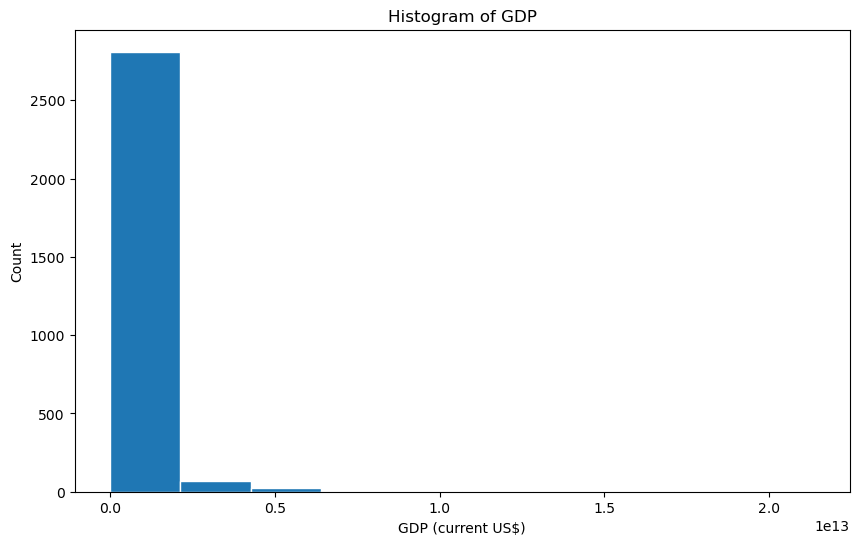

In [8]:
plot_histogram(df['GDP (current US$)'], 'Count', 'GDP (current US$)', 'Histogram of GDP')

In [9]:
outlier = get_outlier(df, 'GDP (current US$)')[['Country Name', 'Year', 'GDP (current US$)']]
outlier

,Country Name,Year,GDP (current US$)
0,India,2002,514937948874.212
1,Sweden,2016,515654671469.547
2,Poland,2013,515761954074.157
3,Belgium,2008,517328087920.078
4,Sweden,2008,517706149201.196
...,...,...,...
385,United States,2015,18206020741000.000
386,United States,2016,18695110842000.000
387,United States,2017,19477336549000.000
388,United States,2018,20533057312000.000


In [10]:
df['GDP (current US$)'] = np.log(df['GDP (current US$)'])

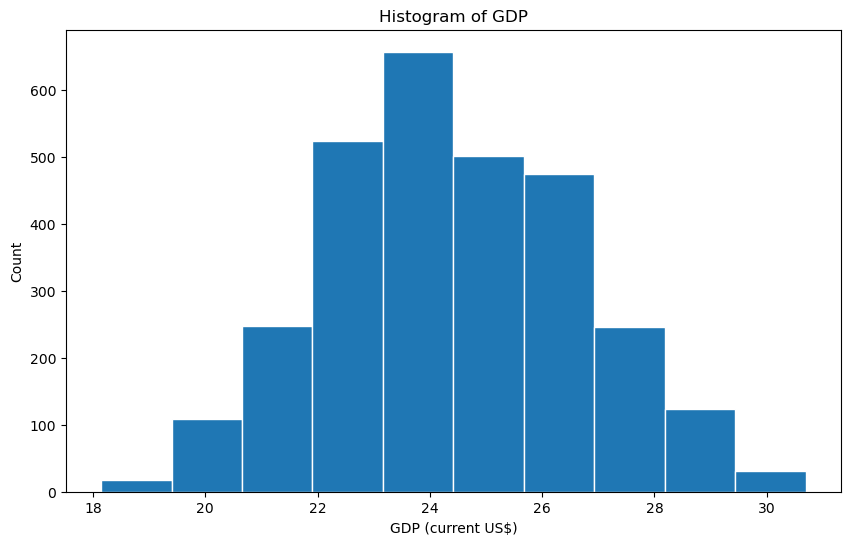

In [11]:
plot_histogram(df['GDP (current US$)'], 'Count', 'GDP (current US$)', 'Histogram of GDP')

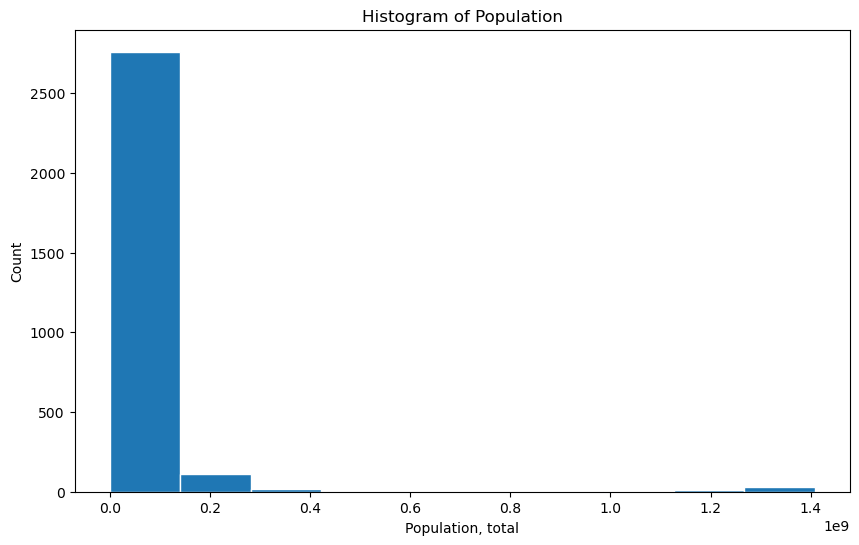

In [12]:
plot_histogram(df['Population, total'], 'Count', 'Population, total', 'Histogram of Population')

In [13]:
outlier = get_outlier(df, 'Population, total')[['Country Name', 'Year', 'Population, total']]
outlier

,Country Name,Year,"Population, total"
0,Turkiye,2014,77181884.000
1,"Iran, Islamic Rep.",2012,77324451.000
2,Ethiopia,2005,77469940.000
3,"Egypt, Arab Rep.",2004,77522427.000
4,Philippines,2000,77958223.000
...,...,...,...
323,India,2019,1383112050.000
324,China,2016,1387790000.000
325,China,2017,1396215000.000
326,China,2018,1402760000.000


In [14]:
df['Population, total'] = np.log(df['Population, total'])

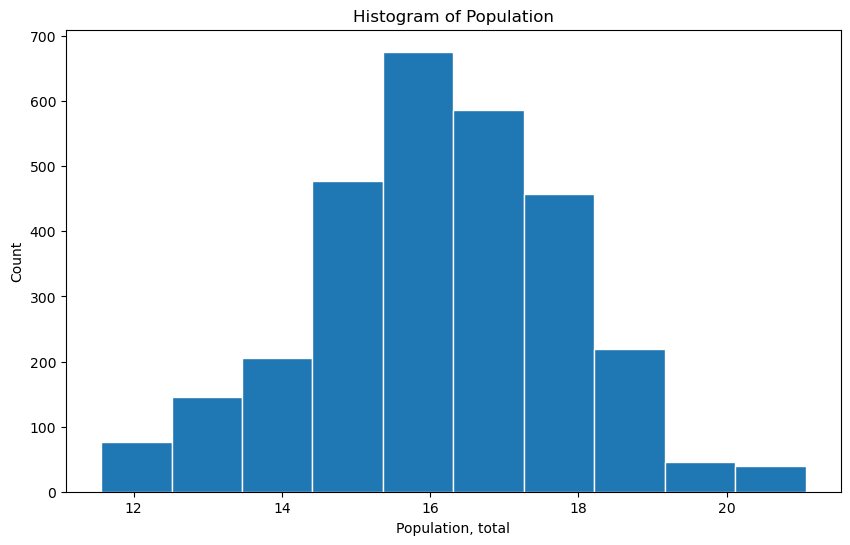

In [15]:
plot_histogram(df['Population, total'], 'Count', 'Population, total', 'Histogram of Population')

In [16]:
df.skew(axis = 0, numeric_only = True)

Year                                                                                                   -0.062
Access to clean fuels and technologies for cooking (% of population)                                   -0.484
Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)    0.447
CO2 emissions (metric tons per capita)                                                                  2.030
GDP (current US$)                                                                                       0.167
Current health expenditure per capita (current US$)                                                     2.869
Immunization, HepB3 (% of one-year-old children)                                                       -1.839
Immunization, measles (% of children ages 12-23 months)                                                -1.591
Life expectancy at birth, total (years)                                                                -0.694
Hospital b

In [17]:
X = df.drop(['Country Name', 'Year', 'Life expectancy at birth, total (years)'], axis=1)
y = df.loc[:,'Life expectancy at birth, total (years)']
X

,Access to clean fuels and technologies for cooking (% of population),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",CO2 emissions (metric tons per capita),GDP (current US$),Current health expenditure per capita (current US$),"Immunization, HepB3 (% of one-year-old children)","Immunization, measles (% of children ages 12-23 months)","Hospital beds (per 1,000 people)","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)","Mortality rate, adult, male (per 1,000 male adults)","Mortality caused by road traffic injury (per 100,000 population)","Mortality rate, under-5 (per 1,000 live births)","Physicians (per 1,000 people)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)","Population, total",Prevalence of undernourishment (% of population),"Suicide mortality rate (per 100,000 population)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,12.500,0.027,0.080,22.548,25.107,63.000,50.000,0.420,40.900,310.940,15.200,108.600,0.166,46.152,17.011,34.500,5.000,7.925
1,13.900,0.024,0.090,22.665,28.920,63.000,53.000,0.420,40.500,314.837,15.100,104.300,0.166,47.286,17.052,31.900,4.900,7.925
2,15.300,0.021,0.110,23.000,32.717,63.000,55.000,0.420,40.100,318.012,15.000,100.000,0.182,48.420,17.070,28.600,4.800,7.924
3,16.800,0.018,0.166,23.037,39.970,64.000,59.000,0.420,39.400,305.060,15.000,95.900,0.183,49.554,17.090,25.400,4.600,7.928
4,18.200,0.015,0.240,23.242,43.261,63.000,60.000,0.420,38.400,293.605,14.400,91.800,0.220,50.688,17.126,22.200,4.400,7.923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,30.000,3.748,0.847,23.717,105.098,87.000,86.000,1.700,31.100,419.827,38.700,60.500,0.177,25.929,16.466,32.600,18.000,5.412
2926,30.000,3.718,0.723,23.746,106.190,90.000,95.000,1.700,30.400,409.210,39.900,57.900,0.174,25.327,16.486,35.100,16.800,5.918
2927,29.800,3.688,0.663,23.590,92.254,89.000,90.000,1.700,29.300,405.925,40.100,56.200,0.179,22.582,16.507,36.300,15.000,6.349
2928,30.000,3.658,0.735,24.254,114.634,89.000,88.000,1.700,28.500,391.373,40.600,53.700,0.201,22.086,16.527,38.200,14.000,6.767


In [18]:
y

0      58.361
1      58.684
2      59.111
3      59.852
4      60.364
        ...  
2925   59.591
2926   60.306
2927   60.709
2928   61.414
2929   61.292
Name: Life expectancy at birth, total (years), Length: 2930, dtype: float64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Access to clean fuels and technologies for cooking (% of population),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",CO2 emissions (metric tons per capita),GDP (current US$),Current health expenditure per capita (current US$),"Immunization, HepB3 (% of one-year-old children)","Immunization, measles (% of children ages 12-23 months)","Hospital beds (per 1,000 people)","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)","Mortality rate, adult, male (per 1,000 male adults)","Mortality caused by road traffic injury (per 100,000 population)","Mortality rate, under-5 (per 1,000 live births)","Physicians (per 1,000 people)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)","Population, total",Prevalence of undernourishment (% of population),"Suicide mortality rate (per 100,000 population)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
381,9.800,9.775,0.252,23.489,39.003,91.000,88.000,0.400,24.200,292.891,30.800,91.300,0.083,53.650,16.831,14.000,7.600,4.690
834,100.000,14.638,13.074,23.915,1038.562,94.000,95.000,5.630,22.000,243.480,12.400,5.500,3.343,8.535,14.106,2.500,19.400,5.450
1898,1.700,0.179,0.111,23.109,24.893,81.000,80.000,0.318,21.500,250.698,26.100,121.600,0.027,69.291,16.779,13.300,5.500,0.520
678,91.100,5.640,2.537,25.016,601.424,96.000,99.000,5.040,16.300,127.807,8.300,6.000,7.256,19.051,16.241,2.500,13.800,3.460
700,100.000,8.319,5.787,23.866,1873.891,96.000,86.000,3.420,10.000,76.363,5.300,2.900,2.447,16.412,13.978,2.500,5.400,16.280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,45.300,0.000,0.638,22.579,48.897,74.000,73.000,0.400,15.900,219.675,25.600,47.400,0.182,66.488,15.215,7.000,3.000,10.304
1095,63.700,5.763,2.461,22.029,186.595,93.000,98.000,1.888,32.800,308.601,26.100,36.600,0.828,20.956,13.520,9.500,32.600,11.971
1130,45.300,2.907,1.083,23.707,171.305,99.000,97.000,0.630,21.000,169.177,16.100,21.300,0.487,25.609,16.027,15.600,3.400,7.080
1294,84.200,3.600,2.983,23.485,343.062,96.000,94.000,1.720,16.900,197.133,15.100,13.200,0.550,15.289,14.850,6.600,2.400,4.990


In [20]:
scaler = StandardScaler()
transformed_X_train = scaler.fit_transform(X_train)
transformed_X_test = scaler.transform(X_test)
pd.DataFrame(transformed_X_train).to_csv('Datasets/World Bank Transformed/X_train without PCA.csv', index=False, header=X_test.columns)
pd.DataFrame(transformed_X_test).to_csv('Datasets/World Bank Transformed/X_test without PCA.csv', index=False, header=X_test.columns)
y_train.to_csv('Datasets/World Bank Transformed/y_train.csv', index=False)
y_test.to_csv('Datasets/World Bank Transformed/y_test.csv', index=False)

In [21]:
pd.DataFrame(transformed_X_train, columns=X_test.columns)

,Access to clean fuels and technologies for cooking (% of population),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",CO2 emissions (metric tons per capita),GDP (current US$),Current health expenditure per capita (current US$),"Immunization, HepB3 (% of one-year-old children)","Immunization, measles (% of children ages 12-23 months)","Hospital beds (per 1,000 people)","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)","Mortality rate, adult, male (per 1,000 male adults)","Mortality caused by road traffic injury (per 100,000 population)","Mortality rate, under-5 (per 1,000 live births)","Physicians (per 1,000 people)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)","Population, total",Prevalence of undernourishment (% of population),"Suicide mortality rate (per 100,000 population)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,-1.383,0.956,-0.781,-0.419,-0.511,0.423,0.124,-1.007,0.322,0.548,1.393,1.304,-1.038,1.441,0.389,0.263,-0.353,-0.559
1,0.953,2.105,1.823,-0.227,0.110,0.574,0.626,1.067,0.042,0.138,-0.688,-0.837,1.174,-1.215,-1.179,-0.828,0.939,-0.431
2,-1.593,-1.314,-0.810,-0.590,-0.520,-0.079,-0.450,-1.040,-0.022,0.198,0.862,2.061,-1.076,2.362,0.359,0.197,-0.583,-1.258
3,0.723,-0.023,-0.317,0.267,-0.161,0.675,0.913,0.833,-0.683,-0.824,-1.152,-0.825,3.829,-0.596,0.050,-0.828,0.326,-0.765
4,0.953,0.611,0.343,-0.250,0.630,0.675,-0.019,0.191,-1.483,-1.251,-1.491,-0.902,0.566,-0.751,-1.252,-0.828,-0.594,1.384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339,-0.463,-1.356,-0.703,-0.827,-0.505,-0.431,-0.951,-1.007,-0.733,-0.060,0.805,0.209,-0.970,2.197,-0.541,-0.401,-0.857,0.383
2340,0.013,0.007,-0.332,-1.074,-0.419,0.524,0.841,-0.417,1.415,0.679,0.862,-0.061,-0.532,-0.484,-1.516,-0.164,2.384,0.662
2341,-0.463,-0.669,-0.612,-0.321,-0.429,0.826,0.769,-0.916,-0.085,-0.480,-0.269,-0.443,-0.764,-0.210,-0.074,0.415,-0.813,-0.158
2342,0.544,-0.505,-0.226,-0.420,-0.322,0.675,0.554,-0.484,-0.606,-0.248,-0.382,-0.645,-0.721,-0.818,-0.751,-0.439,-0.922,-0.508


In [22]:
pca = PCA(n_components=0.9)
pca_data = pca.fit(transformed_X_train)
pca_data.explained_variance_ratio_

array([0.40404254, 0.13034979, 0.09009702, 0.07203025, 0.05362492,
       0.04332919, 0.03726105, 0.029705  , 0.02643601, 0.02388587])

In [23]:
np.cumsum(np.round(pca_data.explained_variance_ratio_, decimals = 4) * 100)

array([40.4 , 53.43, 62.44, 69.64, 75.  , 79.33, 83.06, 86.03, 88.67,
       91.06])

In [24]:
X_train = pca.transform(transformed_X_train)
X_test = pca.transform(transformed_X_test)
X_train.shape

(2344, 10)

In [25]:
header = [f'PCA{i}' for i in range(1,11)]
pd.DataFrame(X_train).to_csv('Datasets/World Bank Transformed/X_train with PCA.csv', index=False, header=header)
pd.DataFrame(X_test).to_csv('Datasets/World Bank Transformed/X_test with PCA.csv', index=False, header=header)